## ***PROJET MACHINE LEARNING : Implementation d'un model de recommandation de repas***

# ***Phase 1 : Business understanding***

**🎯BO 1** : Trouver rapidement des recettes personnalisées, en utilisant des recettes existantes.

**📊DSO 1:** Mettre en place un système de recommandation intelligent capable de proposer des recettes personnalisées en fonction des valeur nutritionnelle ,ingrediants et categories,   en s’appuyant sur des approches de contenu .

**📊Algorithme à appliquer :**
KNN
 




**🎯BO 2 :** Identifier les facteurs qui influencent la popularité d’une recette, afin de comprendre pourquoi certaines plaisent davantage et comment les optimiser pour obtenir de meilleures évaluations.

**📊DSO 2 :** Analyser les données de notation et de consommation des recettes afin de mettre en évidence les corrélations et les associations entre les caractéristiques des recettes (ingrédients, temps de préparation, valeurs nutritionelles, etc.) et leur popularité, en utilisant des techniques comme les règles d’association.

**📊Algorithme à appliquer :**
Règles d’association, Classification

**📊Pourquoi ?**
Identifier les patterns d’ingrédients et caractéristiques qui rendent une recette populaire.

Predire si une recette sera populaire avant sa publication.

**🎯 BO 3** :Anticiper la note qu’une recette pourrait obtenir en fonction de ses caractéristiques (ingrédients, valeurs nutritionnelles, catégorie), afin d’évaluer son potentiel de succès.

**📊 DSO 3** :Développer un modèle de régression capable de prédire la note d’une recette à partir de ses caractéristiques, et identifier les variables les plus influentes grâce à des techniques telles que la régression linéaire.

**📊Algorithme à appliquer :**
Régression linéaire

**📊Pourquoi ?**
Prédiction de notes numériques, simple et interprétable

**🎯BO 4 :**
Proposer des campagnes marketing personnalisées et adaptées à leurs profils et préférences.

**📊 DSO 4 :**
Segmenter les utilisateurs existants (ex. sportifs, gourmets, healthy) en groupes homogènes à l’aide d’algorithmes de clustering tels que K-Means, DBSCAN ou le clustering hiérarchique, afin d’identifier des profils types pour un marketing ciblé.

**📊Algorithme à appliquer :**
K-Means

**📊Pourquoi ?**
Segmenter les utilisateurs en groupes homogènes pour marketing ciblé.

**🎯BO 5 :** Identifier le type de cuisine d’une recette en se basant sur ses ingrédients et regrouper les recettes  selon leurs similarités (nutrition, ingrédients, préférences), afin de faciliter la découverte de nouvelles recettes et améliorer les recommandations personnalisées.

**📊 DSO 5 :**
Utiliser des techniques d’apprentissage non supervisé pour regrouper les recettes  en fonction de leurs caractéristiques et ingrédients, et prédire le type de cuisine d’une recette à partir de sa composition.

**📊Algorithme à appliquer :**
ACP + DBSCAN

**📊Pourquoi ?**
Réduire la dimension des ingrédients (ACP) puis regrouper les recettes similaires (DBSCAN).

# ***Phase 2 : Data understanding***

### **1. Importations necessaires**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import re
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

from itertools import chain
from mlxtend.frequent_patterns import apriori
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
#from imblearn.over_sampling import ADASYN
from threadpoolctl import threadpool_limits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.dummy import DummyRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
import gc

### **2. Charger le dataset**

In [2]:
recipes = pd.read_csv('recipes.csv')
reviews = pd.read_csv('reviews.csv')


La dataset est formée de 2 dataframes : les données sur les recettes se trouvent dans "recipes" et les données des users/profiles dans "reviews".

### a. Explication de colonnes : 

#### i. Recipes : 

| Nom de la colonne              | Signification / Référence               |          Type        |
| ------------------------------ | --------------------------------------- | -------------------- |
| **RecipeId**                   | Identifiant unique de la recette        | `int64`              |
| **Name**                       | Nom de la recette                       | `object` (str)       |
| **AuthorId**                   | Identifiant de l’auteur                 | `int64`              |
| **AuthorName**                 | Nom de l’auteur                         | `object` (str)       |
| **CookTime**                   | Temps de cuisson                        | `object` (str)       |
| **PrepTime**                   | Temps de préparation                    | `object` (str)       |
| **TotalTime**                  | Temps total pour préparer et cuire      | `object` (str)       |
| **DatePublished**              | Date de publication de la recette       | `datetime64[ns]`     |
| **Description**                | Description ou résumé de la recette     | `object` (str)       |
| **Images**                     | URL ou chemin de l’image de la recette  | `object` (str)       |
| **RecipeCategory**             | Catégorie de la recette                 | `object` (str)       |
| **Keywords**                   | Mots-clés associés à la recette         | `object` (str)       |
| **RecipeIngredientQuantities** | Quantité des ingrédients                | `object` (str)       |
| **RecipeIngredientParts**      | Nom des ingrédients                     | `object` (str)       |
| **AggregatedRating**           | Note moyenne de la recette              | `float64`            |
| **ReviewCount**                | Nombre d’avis                           | `int64`              |
| **Calories**                   | Valeur énergétique totale               | `float64`            |
| **FatContent**                 | Quantité totale de matières grasses (g) | `float64`            |
| **SaturatedFatContent**        | Quantité de graisses saturées (g)       | `float64`            |
| **CholesterolContent**         | Teneur en cholestérol (mg)              | `float64`            |
| **SodiumContent**              | Teneur en sodium (mg)                   | `float64`            |
| **CarbohydrateContent**        | Quantité de glucides (g)                | `float64`            |
| **FiberContent**               | Quantité de fibres (g)                  | `float64`            |
| **SugarContent**               | Quantité de sucres (g)                  | `float64`            |
| **ProteinContent**             | Quantité de protéines (g)               | `float64`            |
| **RecipeServings**             | Nombre de portions                      | `int64`              |
| **RecipeYield**                | Rendement ou quantité finale obtenue    | `object` (str)       |
| **RecipeInstructions**         | Étapes de préparation de la recette     | `object` (str)       |


#### ii. Reviews : 

| Nom de la colonne | Signification / Référence                   |         Type         |
| ----------------- | ------------------------------------------- | -------------------- |
| **ReviewId**      | Identifiant unique de l’avis                | `int64`              |
| **RecipeId**      | Identifiant de la recette associée à l’avis | `int64`              |
| **AuthorId**      | Identifiant de l’auteur de l’avis           | `int64`              |
| **AuthorName**    | Nom de l’auteur de l’avis                   | `object` (str)       |
| **Rating**        | Note donnée à la recette                    | `int64`              |
| **Review**        | Texte de l’avis / commentaire               | `object` (str)       |
| **DateSubmitted** | Date à laquelle l’avis a été soumis         | `datetime64[ns]`     |
| **DateModified**  | Date de dernière modification de l’avis     | `datetime64[ns]`     |


#### ii. Suppression de colonnes sémantiquement pas nécessaires : 

In [3]:
df_reviews = reviews.drop(
    ['AuthorName', 'DateSubmitted', 'DateModified'], 
    axis=1, 
    errors='ignore'
)

df_recipes = recipes.drop(
    ['Images', 'AuthorName', 'DatePublished', 'AuthorId'], 
    axis=1, 
    errors='ignore'
)

del reviews
del recipes
gc.collect()

print("Colonnes restantes dans les recipes : \n")
print(df_recipes.columns.tolist())
print(" \n")
print("Colonnes restantes dans les reviews : \n")
print(df_reviews.columns.tolist())


Colonnes restantes dans les recipes : 

['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeYield', 'RecipeInstructions']
 

Colonnes restantes dans les reviews : 

['ReviewId', 'RecipeId', 'AuthorId', 'Rating', 'Review']


### b. Les dimensions du dataset

In [4]:
print("Taille des recipes : ")
print(df_recipes.shape)
print("\nTaille des reviews : ")
print(df_reviews.shape)


Taille des recipes : 
(522517, 24)

Taille des reviews : 
(1401982, 5)


##### On remarque que la dataset est très géante, donc on va procéder à la diminution de nombre de lignes :
Réduction aléatoire de recipes,

puis récupération des RecipeId disponibles

enfin, filtrage des reviews correspondantes

In [5]:
#df_recipes_small = df_recipes.sample(frac=0.0025, random_state=42)
df_recipes_small = df_recipes.sample(frac=0.05, random_state=42)

selected_ids = df_recipes_small['RecipeId'].tolist()

df_reviews_small = df_reviews[df_reviews['RecipeId'].isin(selected_ids)]


##### Les nouveaux dimensions :

In [6]:
print("Taille des recipes : ")
print(df_recipes_small.shape)
print("\nTaille des reviews : ")
print(df_reviews_small.shape)


Taille des recipes : 
(26126, 24)

Taille des reviews : 
(71876, 5)


### c. Le pourcentage des valeurs nulles du dataset par colonne :

In [7]:
null_percent_recipes = df_recipes_small.isnull().mean() * 100
print("Pourcentage de valeurs nulles par colonne (recipes) :")
print(null_percent_recipes)
null_percent_reviews = df_reviews_small.isnull().mean() * 100
print("\nPourcentage de valeurs nulles par colonne (reviews) :")
print(null_percent_reviews)


Pourcentage de valeurs nulles par colonne (recipes) :
RecipeId                       0.000000
Name                           0.000000
CookTime                      15.838628
PrepTime                       0.000000
TotalTime                      0.000000
Description                    0.000000
RecipeCategory                 0.145449
Keywords                       3.127153
RecipeIngredientQuantities     0.000000
RecipeIngredientParts          0.000000
AggregatedRating              48.090025
ReviewCount                   47.010641
Calories                       0.000000
FatContent                     0.000000
SaturatedFatContent            0.000000
CholesterolContent             0.000000
SodiumContent                  0.000000
CarbohydrateContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
ProteinContent                 0.000000
RecipeServings                34.739340
RecipeYield                   67.270152
RecipeInstructions        

#### on remarque que 70% des records de RecipeYield sont nuls et meme les valeurs non nuls ne sont pas significatives. C'est pour ca qu'on a décider de la supprimer : 

In [8]:
df_recipes_small = df_recipes_small.drop(
    ['RecipeYield'], 
    axis=1, 
    errors='ignore'
)
print("Colonnes de recipes restantes apres suppression : \n")
print(df_recipes_small.columns.tolist())


Colonnes de recipes restantes apres suppression : 

['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeInstructions']


 #### d/ Valeurs nutritionnelles saisies incorrectement
 
 Toute valeur nutritionnelle égale à 0 ou infini constitue une erreur de saisie de données, nous pouvons donc les supprimer sans risque.

In [9]:
nutrition_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

df_recipes_small = df_recipes_small.replace([np.inf, -np.inf], np.nan)

rows_with_zeros = df_recipes_small[(df_recipes_small[nutrition_cols] == 0).any(axis=1)].copy()
print(f"Lignes à supprimer : {rows_with_zeros.shape[0]}")


Lignes à supprimer : 6563


In [10]:
df_recipes_small = df_recipes_small.dropna(subset=nutrition_cols)
df_recipes_small = df_recipes_small[(df_recipes_small[nutrition_cols] != 0).all(axis=1)]


### e. Nombre d'avis

Les recettes dont le nombre d'avis ReviewCount est nul ont simplement 0 reviews associés.

In [11]:
df_recipes_small['ReviewCount'] = df_recipes_small['ReviewCount'].fillna(0)

 ### f. Description sur les colonnes

In [12]:
print(df_recipes_small.describe())
print(df_reviews_small.describe())


            RecipeId  AggregatedRating   ReviewCount      Calories  \
count   19563.000000      10153.000000  19563.000000  19563.000000   
mean   269997.584011          4.633606      2.913868    533.416955   
std    155390.668742          0.638633     13.375748    826.973719   
min        44.000000          1.000000      0.000000     11.500000   
25%    136647.500000          4.500000      0.000000    219.400000   
50%    267144.000000          5.000000      1.000000    361.900000   
75%    404039.500000          5.000000      2.000000    569.100000   
max    541359.000000          5.000000    642.000000  45609.000000   

         FatContent  SaturatedFatContent  CholesterolContent  SodiumContent  \
count  19563.000000         19563.000000        19563.000000   19563.000000   
mean      28.206502            11.473097          107.623902     750.350861   
std       50.564534            24.040932          172.974700    1723.707172   
min        0.100000             0.100000            0

### g. Distribution de données : ( histogrammes / boxplots )

 #### **i.recipes :** 

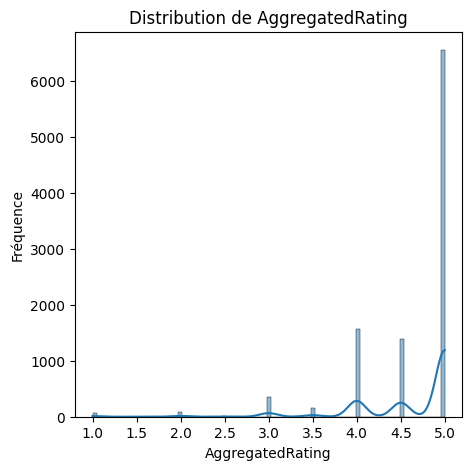

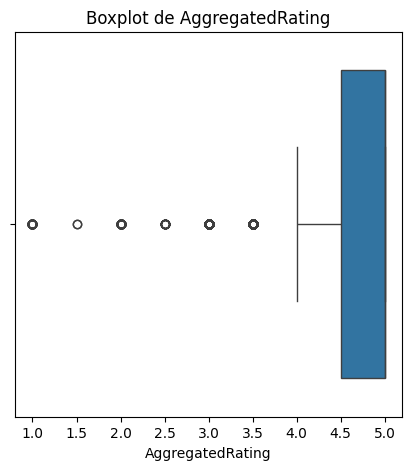

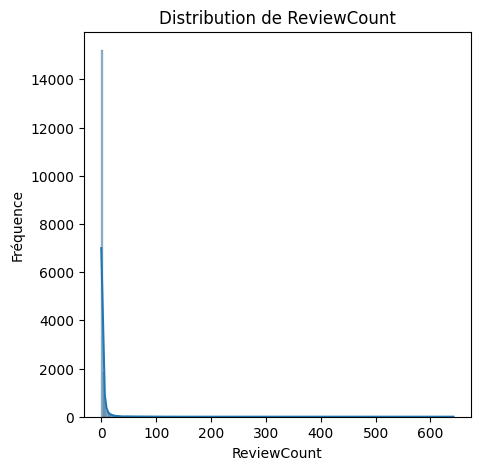

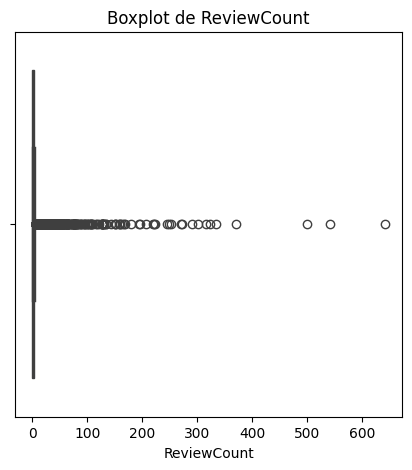

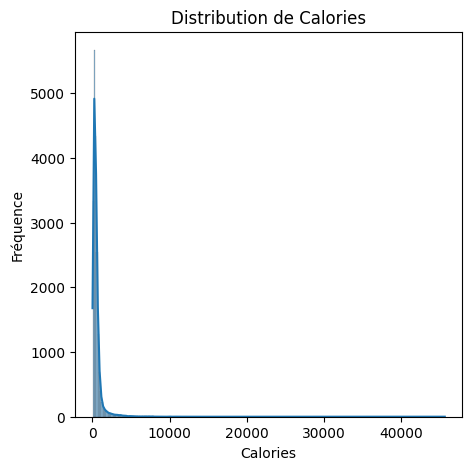

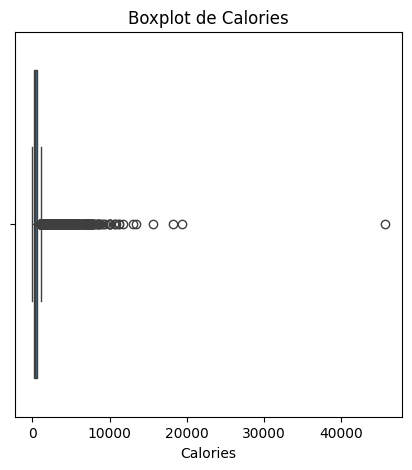

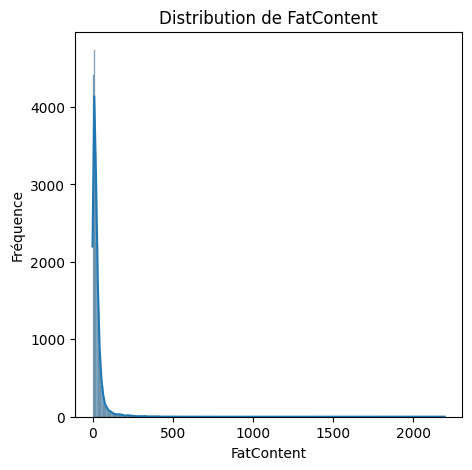

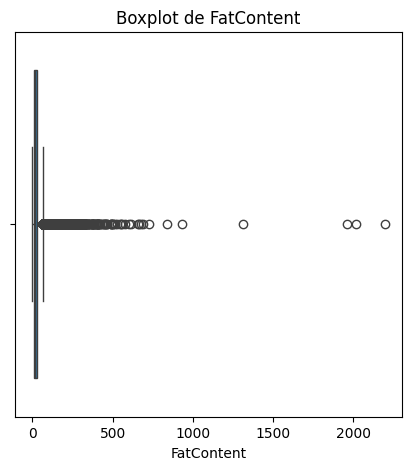

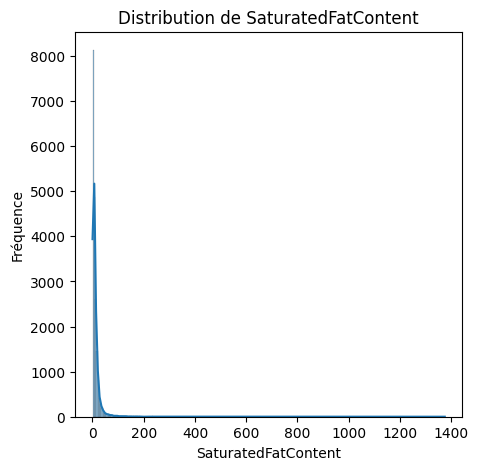

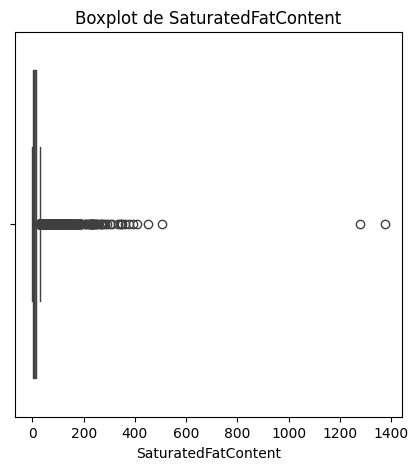

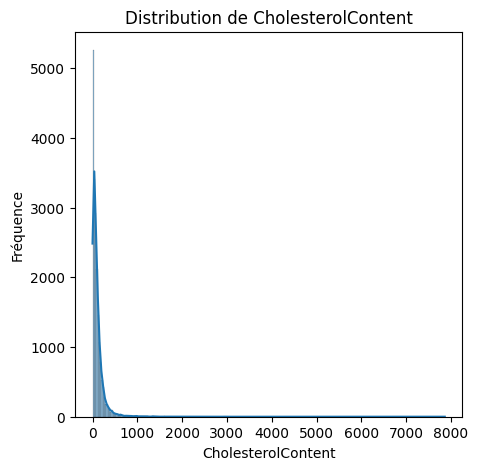

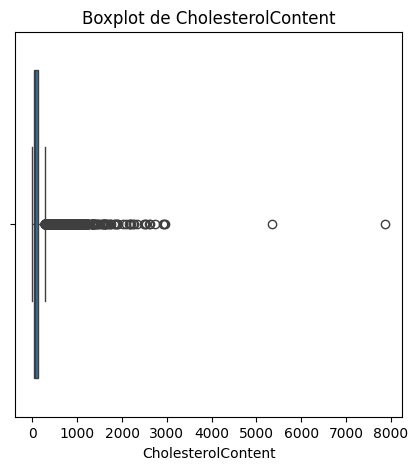

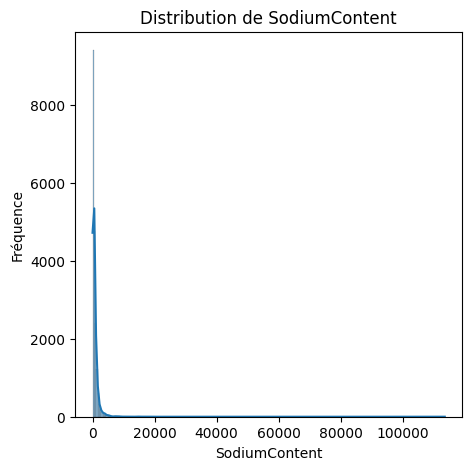

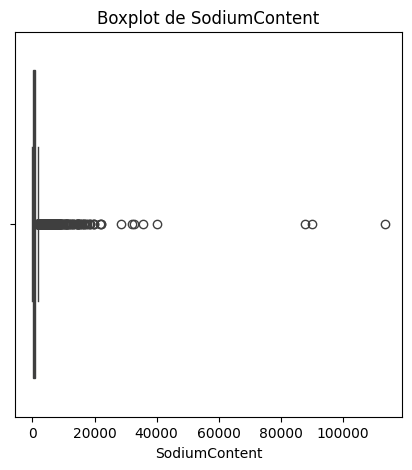

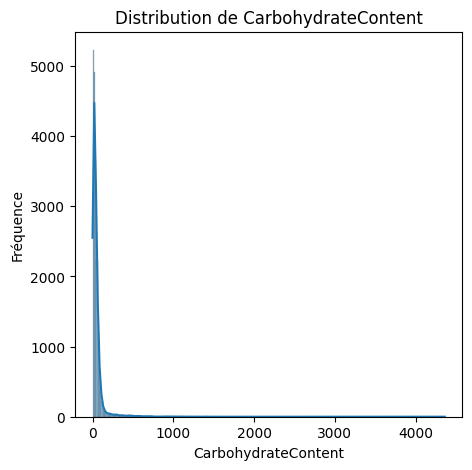

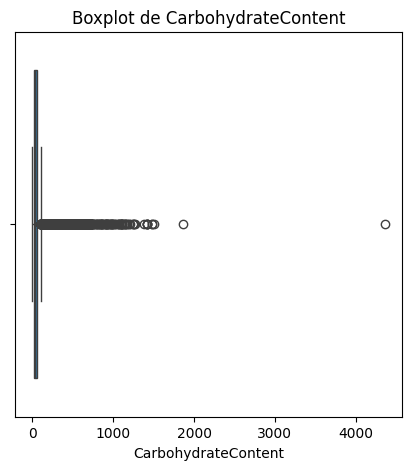

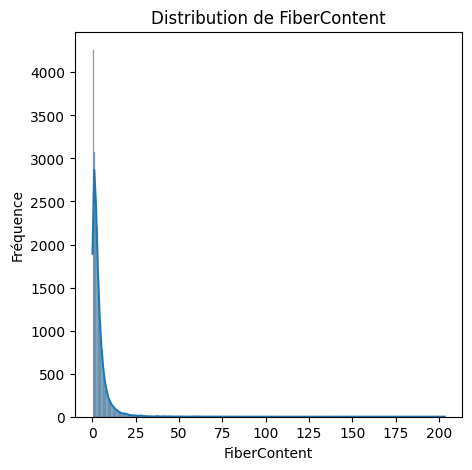

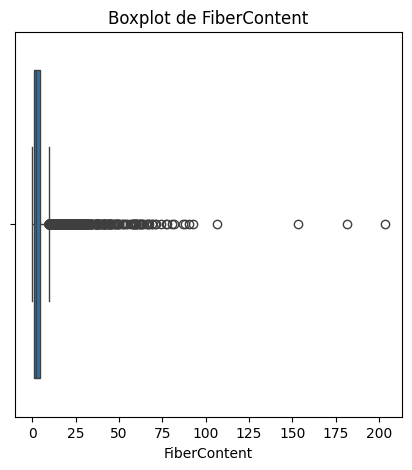

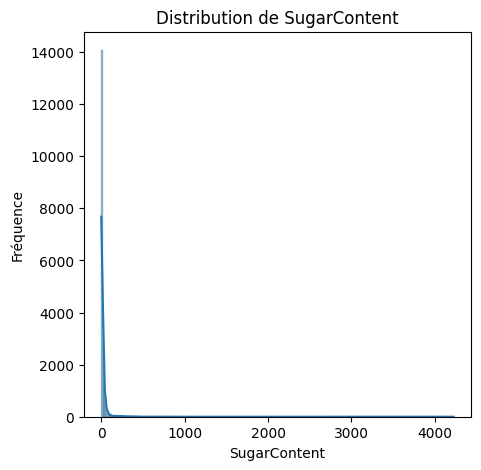

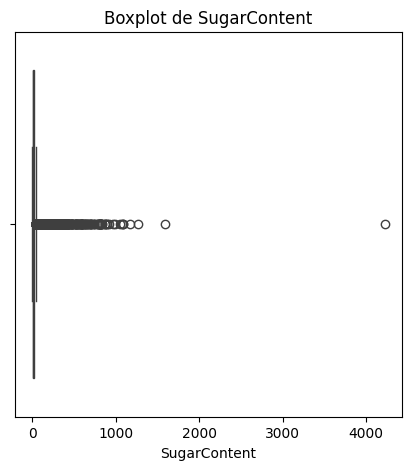

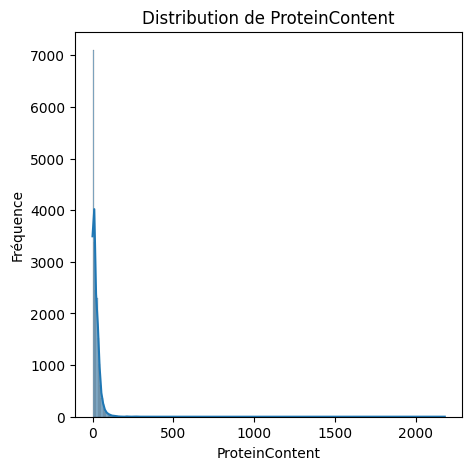

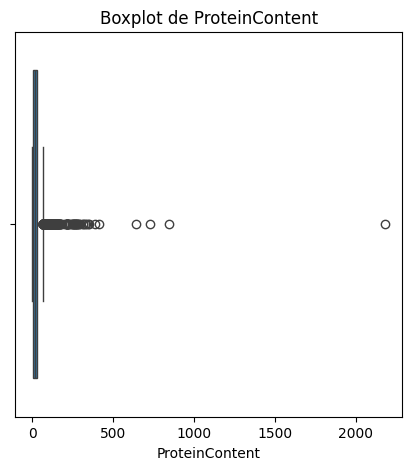

In [13]:
numeric_cols = [
    "AggregatedRating", "ReviewCount", "Calories", "FatContent",
    "SaturatedFatContent", "CholesterolContent", "SodiumContent",
    "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent"]
for col in numeric_cols:
    plt.figure(figsize=(5,5))
    sns.histplot(df_recipes_small[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()
    plt.figure(figsize=(5,5))
    sns.boxplot(x=df_recipes_small[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


 #### **ii.reviews :** 

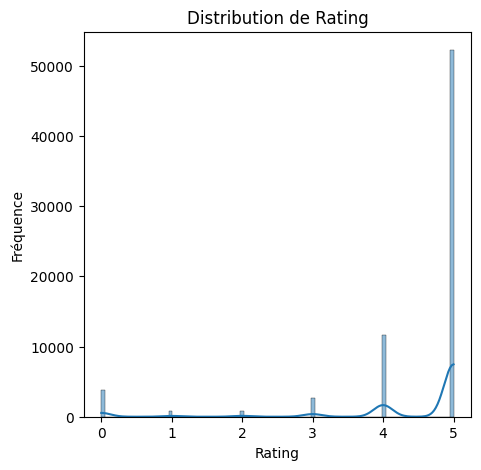

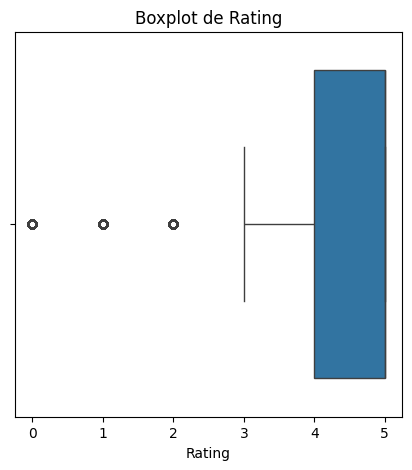

In [14]:
plt.figure(figsize=(5,5))
sns.histplot(df_reviews_small["Rating"], kde=True)
plt.title(f"Distribution de Rating")
plt.xlabel("Rating")
plt.ylabel("Fréquence")
plt.show()
plt.figure(figsize=(5,5))
sns.boxplot(x=df_reviews_small["Rating"])
plt.title(f"Boxplot de Rating")
plt.show()


 ## Interpretation de la description et de la distrubtion ( Quelques informations a retenir sur les données ) :

#### - Recipes

* Notes globalement élevées : moyenne ≈ 4,67/5.

* Popularité très inégale : ReviewCount de 1 à 157 avis.

* Nutrition variable avec des valeurs extrêmes : calories 0–6553 kcal, protéines 0–712 g, matières grasses 0–496 g.

* Portions : 1–84, médiane 6.



#### - Reviews

* Notes majoritairement élevées : moyenne ≈ 4,67/5.

* Variabilité faible : la majorité des avis sont 4 ou 5.

* Certaines recettes ont peu d’avis, ce qui peut influencer la fiabilité de la note moyenne.

→ Points clés : valeurs extrêmes à contrôler, popularité et nombre d’avis très variables.

In [15]:
zero_counts = (df_recipes_small == 0).sum()

print(zero_counts[zero_counts > 0])


ReviewCount    9198
dtype: int64


# ***Phase 3 : Data preparation***

 ### Formater les données pour une meilleur utilisation ML :

 #### a/ Nom de la recette :

In [16]:
def clean_name(name):
    if pd.isna(name):
        return None
    name = name.lower()
    name = re.sub(r"[^a-z\s]", "", name)
    name = re.sub(r"\s+", " ", name)
    name = name.strip()
    return name
df_recipes_small['Name'] = df_recipes_small['Name'].apply(clean_name)


 #### b/ Prep-time / Cook-time / Total-time de la recette :

In [17]:
def convert_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    time_str = str(time_str).lower().strip()
    if time_str.startswith('pt'):
        hours = re.search(r'(\d+)h', time_str)
        minutes = re.search(r'(\d+)m', time_str)
        total_minutes = 0
        if hours:
            total_minutes += int(hours.group(1)) * 60
        if minutes:
            total_minutes += int(minutes.group(1))
        return total_minutes if total_minutes > 0 else None
    hours = re.search(r'(\d+)\s*h', time_str)
    minutes = re.search(r'(\d+)\s*m', time_str)
    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60
    if minutes:
        total_minutes += int(minutes.group(1))
    if total_minutes == 0 and time_str.isdigit():
        return int(time_str)
    return total_minutes if total_minutes > 0 else None


for col in ['CookTime', 'PrepTime', 'TotalTime']:
    df_recipes_small[col] = df_recipes_small[col].apply(convert_to_minutes)


 #### c/ FatContent / SaturatedFatContent / CholesterolContent / SodiumContent / CarbohydrateContent / FiberContent / SugarContent / ProteinContent : 
 (Les valeurs manquantes sont remplacées par la moyenne et on a utilisé le StandardScaler pour la standarisation de leurs valeurs)

In [18]:
for col in nutrition_cols:
    mean_val = df_recipes_small[col].mean()
    df_recipes_small[col] = df_recipes_small[col].fillna(mean_val)
scaler = MinMaxScaler()


* Justification de choix : 

    Pourquoi MinMaxScaler ? 
    - met toutes les colonnes numériques sur une échelle commune [0,1], ce qui conserve les proportions relatives des nutriments et évite que les variables avec de grandes valeurs (ex : Sodium, Calories) dominent les algorithmes ML.

    Pourquoi Imputation par la moyenne ? 
    - remplace les valeurs manquantes par la moyenne de la colonne pour conserver la distribution globale et éviter de biaiser les données, tout en gardant la cohérence des quantités nutritionnelles.

 #### d/ Description :

In [19]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text
df_recipes_small['Description'] = df_recipes_small['Description'].apply(clean_text)


 #### d/ RecipeInstructions :

In [20]:
def clean_instructions(instr):
    if pd.isna(instr):
        return ""
    
    instr = str(instr)
    steps = re.findall(r'"(.*?)"', instr)
    text = " ".join(steps) if steps else instr
    text = text.lower()                       
    text = re.sub(r"[^a-z0-9\s]", "", text)  
    text = re.sub(r"\s+", " ", text)         
    text = text.strip()                       
    return text
df_recipes_small['RecipeInstructions'] = df_recipes_small['RecipeInstructions'].apply(clean_instructions)


 #### e/ RecipeCategory :

Nombre de Categories uniques :

In [21]:
print("Nombre de catégories uniques :", df_recipes_small['RecipeCategory'].nunique())


Nombre de catégories uniques : 230


Remarque : 
- Le nombre de categories uniques est trés élevé (138) ce qui empeche de procéder directement a un encodage car ca risque de creer beaucoup de colonnes qui sont nulles et inutiles.
On va donc essayer de faire un traitement spécifique :

ETAPE 1 : Ces catégories sont trés spécifiques, donc on va les mettre tout a 'None' puis ensuite les remplacer par une categorie qu'on va créer qui est 'Other'

In [22]:

non_food_tags = [
    'bath/beauty', '< 15 mins', '< 30 mins', '< 60 mins', '< 4 hours',
    'easy', 'beginner cook', 'kid friendly', 'inexpensive', 'from scratch',
    'high protein', 'low protein', 'low cholesterol', 'very low carbs',
    'high in...'
]
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].str.lower()
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].apply(
    lambda x: None if x in non_food_tags else x
)


ETAPE 2 : Regroupement des catégories rares (Si une catégorie a moins de 5 recettes, on la remplace par 'other' pour réduire la dimensionnalité avant encodage)

In [23]:
category_counts = df_recipes_small['RecipeCategory'].value_counts()
rare_categories = category_counts[category_counts < 5].index.tolist()
print ("Catégories rares :", rare_categories)
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].apply(
    lambda x: 'other' if x in rare_categories else x
)


Catégories rares : ['spring', 'peanut butter', 'cherries', 'mango', 'citrus', 'egg free', 'orange roughy', 'russian', 'bass', 'microwave', 'broil/grill', 'vegan', 'raspberries', 'creole', 'pumpkin', 'pennsylvania dutch', 'scandinavian', 'sweet', 'rabbit', 'polynesian', 'moose', 'native american', 'vietnamese', 'whitefish', 'mixer', 'artichoke', 'pheasant', 'hunan', 'hungarian', 'medium grain rice', 'austrian', "st. patrick's day", 'danish', 'stir fry', 'swiss', 'south african', 'norwegian', 'icelandic', 'cambodian', 'bean soup', 'hawaiian', 'szechuan', 'plums', 'ethiopian', 'nepalese', 'quail', 'puerto rican', 'camping', 'filipino', 'chilean', 'finnish', 'scottish', 'refrigerator', 'baking', 'pot roast', 'no cook', 'peruvian', 'indonesian', 'lime', 'guatemalan', 'malaysian', 'steam', 'palestinian', 'cantonese', 'swedish', 'key lime pie']


ETAPE 3 : Gestion des valeurs manquantes (Les valeurs manquantes (None) ou supprimées à l’étape 1 → remplacer par 'other')

In [24]:
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].fillna('other')
print("Nombre de catégories uniques après nettoyage :", df_recipes_small['RecipeCategory'].nunique())


Nombre de catégories uniques après nettoyage : 151


ETAPE 4 : OneHot Encodage

In [25]:
df_recipes_small = pd.get_dummies(
    df_recipes_small, 
    columns=['RecipeCategory'], 
    prefix='Category'            
)


Justification de choix : 


On a utilisé OneHotEncoder parce que :

 * Les catégories n’ont aucun ordre implicite, donc un encodage numérique simple (LabelEncoder) pourrait induire une relation fictive.

 * OneHot transforme chaque catégorie en colonne binaire, ce qui est idéal pour les algos ML sensibles à l’ordre (régression, NN, SVM).

 #### e/ RecipeIngredientParts et RecipeIngredientQuantities :

ETAPE 1 : nettoyage

In [26]:
def parse_ingredients(parts_str, quantities_str):
    if pd.isna(parts_str) or pd.isna(quantities_str):
        return [], []
    
    parts_str = str(parts_str)
    quantities_str = str(quantities_str)
    
    parts = re.findall(r'"(.*?)"', parts_str)
    quantities = re.findall(r'"(.*?)"', quantities_str)
    
    if not parts:
        parts = [p.strip() for p in parts_str.split(',') if p.strip()]
    if not quantities:
        quantities = [q.strip() for q in quantities_str.split(',') if q.strip()]
    
    if len(quantities) != len(parts):
        quantities = [1]*len(parts)
    
    quantities_float = []
    for q in quantities:
        try:
            quantities_float.append(float(q))
        except (ValueError, TypeError):
            m = re.findall(r'[\d.]+', str(q))
            quantities_float.append(float(m[0]) if m else 1)
    
    return parts, quantities_float


ETAPE 2 : encodage avec Multi-hot encoding

In [27]:
df_recipes_small['IngredientList'], df_recipes_small['IngredientQtyList'] = zip(*df_recipes_small.apply(
    lambda row: parse_ingredients(row['RecipeIngredientParts'], row['RecipeIngredientQuantities']),
    axis=1
))
all_ingredients = sorted(set(chain.from_iterable(df_recipes_small['IngredientList'])))
print(f"Nombre total d'ingrédients uniques : {len(all_ingredients)}")
ingredient_matrix = np.zeros((len(df_recipes_small), len(all_ingredients)))
for i, (parts, qtys) in enumerate(zip(df_recipes_small['IngredientList'], df_recipes_small['IngredientQtyList'])):
    for part, qty in zip(parts, qtys):
        idx = all_ingredients.index(part)
        ingredient_matrix[i, idx] = qty

df_ingredients_encoded = pd.DataFrame(ingredient_matrix, columns=all_ingredients)
scaler = MinMaxScaler()
df_ingredients_encoded_scaled = pd.DataFrame(scaler.fit_transform(df_ingredients_encoded), columns=all_ingredients)
df_ingredients_encoded_scaled.head()
df_recipes_small_reset = df_recipes_small.reset_index(drop=True)
df_ingredients_encoded_scaled_reset = df_ingredients_encoded_scaled.reset_index(drop=True)
df_recipes_small = pd.concat([df_recipes_small_reset, df_ingredients_encoded_scaled_reset], axis=1)
cols_to_drop = ['RecipeIngredientParts', 'RecipeIngredientQuantities', 'IngredientList', 'IngredientQtyList']
df_recipes_small.drop(columns=cols_to_drop, inplace=True)


Nombre total d'ingrédients uniques : 3618


 #### f/ AggregatedRating :

In [28]:
mean_rating = df_recipes_small['AggregatedRating'].mean()
df_recipes_small['AggregatedRating'] = df_recipes_small['AggregatedRating'].fillna(mean_rating)
scaler = MinMaxScaler()
df_recipes_small['AggregatedRating'] = scaler.fit_transform(
    df_recipes_small[['AggregatedRating']]
)


 #### g/ Keywords :

ETAPE 1 : Nettoyage

In [29]:
def clean_keywords(kw_str):
    if pd.isna(kw_str) or not isinstance(kw_str, str):
        return []
    kw_str = kw_str.replace('c(', '').replace(')', '').replace('"', '')
    keywords = [k.strip() for k in kw_str.split(',') if k.strip()]
    keywords = [k for k in keywords if not re.search(r'\b(mins?|hours?)\b', k, re.IGNORECASE)]
    keywords = [re.sub(r'\.{2,}', '', k).strip() for k in keywords]
    keywords = [k for k in keywords if k]
    return keywords
df_recipes_small['CleanedKeywords'] = df_recipes_small['Keywords'].apply(clean_keywords)
df_recipes_small.drop(columns=['Keywords'], inplace=True)


ETAPE 2 : Encodage

In [30]:

mlb = MultiLabelBinarizer()
keywords_encoded = mlb.fit_transform(df_recipes_small['CleanedKeywords'])
df_keywords_encoded = pd.DataFrame(
    keywords_encoded,
    columns=mlb.classes_,
    index=df_recipes_small.index
)
df_recipes_small = pd.concat([df_recipes_small, df_keywords_encoded], axis=1)
df_recipes_small.drop(columns=['CleanedKeywords'], inplace=True, errors='ignore')


 #### h/ rating de Reviews :

In [31]:
df_reviews_small = df_reviews_small.copy()
mean_rating = df_reviews_small['Rating'].mean()
df_reviews_small['Rating'] = df_reviews_small['Rating'].fillna(mean_rating)
scaler = MinMaxScaler()
df_reviews_small['Rating_scaled'] = scaler.fit_transform(df_reviews_small[['Rating']])
df_reviews_small['Rating'] = df_reviews_small['Rating_scaled']
df_reviews_small.drop(columns=['Rating_scaled'], inplace=True)


#### Fusionner les 2 dataframes reviews et recipes sur la cle etrangere RecipeId :

In [32]:
del df_reviews
del df_recipes
gc.collect()

165739

In [33]:
# Not needed for BO5 - BO5 only uses df_recipes_small
# This merge causes MemoryError due to large number of ingredient columns
# df_finale = pd.merge(df_reviews_small, df_recipes_small, on='RecipeId', how='inner')
print("✓ Skipping merge - BO5 uses df_recipes_small directly")

✓ Skipping merge - BO5 uses df_recipes_small directly


In [34]:
#df_finale.describe()


#### TABLEAU COMPARATIF : LA STRUCTURE DE DONNEES AVANT ET APRES PREPARATION
 

| Colonne                                                                                                                                             | Valeurs originales                                               | Valeurs après traitement                                           | Type de transformation            | Objectif pour ML                                         |
| --------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------- | ------------------------------------------------------------------ | --------------------------------- | -------------------------------------------------------- |
| `Name`                                                                                                                                              | Texte libre, majuscules/minuscules, espaces, caractères spéciaux | Minuscules, sans ponctuation ni espaces superflus                  | Nettoyage texte                   | Standardiser pour NLP / features textuelles              |
| `CookTime`, `PrepTime`, `TotalTime`                                                                                                                 | Strings type `"PT1H20M"`, `"45M"`, `"2H"`                        | Nombres entiers → minutes (ex: 80, 45, 120)                        | Parsing / Feature engineering     | Variables numériques continues exploitables              |
| `FatContent`, `SaturatedFatContent`, `CholesterolContent`, `SodiumContent`, `CarbohydrateContent`, `FiberContent`, `SugarContent`, `ProteinContent` | Strings avec unités (`"10g"`, `"5 mg"`), NaN possibles           | Float normalisé entre 0 et 1                                       | Imputation moyenne + MinMaxScaler | Uniformiser échelle pour ML                              |
| `Description`                                                                                                                                       | Texte long, ponctuation, majuscules/minuscules                   | Texte nettoyé, minuscules, ponctuation supprimée                   | Nettoyage texte                   | Préparation pour NLP ou features textuelles              |
| `RecipeCategory`                                                                                                                                    | Strings multiples, ponctuation, références temps                 | OneHotEncoding (colonnes binaires par catégorie)                   | Encodage catégoriel               | Transformer catégories textuelles en features numériques |
| `Keywords` → `CleanedKeywords`                                                                                                                      | Strings multiples, ponctuation, `< 60 Mins`                      | Listes propres, sans ponctuation ni temps → OneHotEncoding         | Nettoyage + encodage multi-label  | Transformer mots-clés en features binaires exploitables  |
| `RecipeIngredientParts` & `RecipeIngredientQuantities`                                                                                              | Strings avec guillemets, nombres, NaN                            | Listes Python de strings et floats → OneHotEncoding + MinMaxScaler | Parsing + feature engineering     | Représentation numérique des ingrédients et quantités    |
| `AggregatedRating`                                                                                                                                  | Float avec NaN, valeurs répétitives (0 à 1)                      | Float normalisé entre 0 et 1, NaN remplacés par moyenne            | Imputation + scaling              | Normalisation des notes pour ML                          |
| `Review`                                                                                                                                            | Texte libre, majuscules/minuscules, ponctuation                  | Texte nettoyé, minuscules, ponctuation supprimée                   | Nettoyage texte                   | Préparation NLP ou features textuelles                   |
| `Rating`                                                                                                                                            | Entiers 1–5, NaN possibles                                       | `Rating_scaled` float entre 0 et 1, original supprimé              | Imputation + MinMaxScaler         | Valeur normalisée pour ML                                |
| `RecipeId`                                                                                                                                          | Identifiant unique recette                                       | Inchangé                                                           | Clé étrangère                     | Permet la fusion avec `reviews` et association 1:1       |


# BO5 : Classification du type de cuisine à partir des ingrédients

**🎯 Business Objective :** Prédire le type de cuisine d'une recette à partir de ses ingrédients

**📊 Data Science Objective :** Développer un modèle de classification supervisée capable d'assigner une catégorie de cuisine à chaque recette en se basant uniquement sur ses ingrédients.

**📊 Approche :**
- **Type de problème :** Classification multi-classes (apprentissage supervisé)
- **Target :** Type de cuisine (Italian, Mexican, Asian, Indian, French, American, etc.)
- **Features :** Ingrédients encodés (colonnes binaires)
- **Algorithmes à tester :** 
  1. Naive Bayes (selon le cours Chapitre 4)
  2. SVM (selon le cours Support Vector Machines)
  3. XGBoost (selon le cours XGBoost)
- **Évaluation :** Accuracy, Precision, Recall, F1-Score, Matrice de confusion
- **Sélection :** Comparer les 3 modèles et choisir le meilleur

## Étape 1 : Feature Engineering

### 1.1 Extraction des ingrédients et création des labels de cuisine

In [35]:


df_bo5 = df_recipes_small.copy()

# Définition des marqueurs de cuisine
cuisine_markers = {
    'Italian': ['parmesan', 'mozzarella', 'basil', 'oregano', 'pasta', 'ricotta', 'pesto', 'prosciutto'],
    'Mexican': ['tortilla', 'jalapeno', 'cilantro', 'cumin', 'salsa', 'chipotle', 'taco', 'enchilada'],
    'Asian': ['soy sauce', 'ginger', 'sesame', 'rice vinegar', 'sriracha', 'mirin', 'sake', 'wonton'],
    'Indian': ['curry', 'turmeric', 'cardamom', 'garam masala', 'tandoori', 'naan', 'dal'],
    'French': ['thyme', 'rosemary', 'dijon', 'shallot', 'baguette', 'croissant', 'brie'],
    'American': ['bacon', 'ranch', 'barbecue', 'burger', 'cornbread', 'maple syrup']
}

# Colonnes à exclure
exclude_cols = ['RecipeId', 'Name', 'Description', 'ReviewCount', 
                'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 
                'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeCategory',
                'RecipeServings', 'RecipeInstructions', 'AggregatedRating', 'CleanedKeywords',
                'CookTime', 'PrepTime', 'TotalTime']


ingredient_cols = [col for col in df_bo5.columns if col not in exclude_cols]

print(f"Nombre total de recettes : {len(df_bo5)}")
print(f"Nombre de colonnes d'ingrédients : {len(ingredient_cols)}")


print("Recherche des colonnes correspondant aux marqueurs...")
marker_to_cols = {}

for cuisine, markers in cuisine_markers.items():
    marker_to_cols[cuisine] = {}
    for marker in markers:
        # Recherche case-insensitive plus rapide
        marker_lower = marker.lower()
        matching_cols = [col for col in ingredient_cols if marker_lower in col.lower()]
        if matching_cols:
            marker_to_cols[cuisine][marker] = matching_cols

print(f"Marqueurs trouvés pour chaque cuisine :")
for cuisine, markers_dict in marker_to_cols.items():
    print(f"  {cuisine}: {len(markers_dict)} marqueurs avec colonnes")


def assign_cuisine_vectorized(df, marker_to_cols):
    n_rows = len(df)
    cuisine_names = list(marker_to_cols.keys())
    cuisine_scores = np.zeros((n_rows, len(cuisine_names)))
    
    print(f"  Calcul des scores pour {n_rows} recettes et {len(cuisine_names)} cuisines...")
    
    # Pour chaque cuisine, calculer les scores en une opération vectorisée
    for cuisine_idx, cuisine in enumerate(cuisine_names):
        # Collecter toutes les colonnes pour cette cuisine
        all_cuisine_cols = []
        for marker, cols in marker_to_cols[cuisine].items():
            all_cuisine_cols.extend(cols)
        
        # Supprimer les doublons
        all_cuisine_cols = list(set(all_cuisine_cols))
        
        # Calculer le score en une seule opération
        if all_cuisine_cols:
            cuisine_scores[:, cuisine_idx] = df[all_cuisine_cols].sum(axis=1).values
    
    # Trouver l'index de la cuisine avec le score max
    max_idx = np.argmax(cuisine_scores, axis=1)
    max_scores = np.max(cuisine_scores, axis=1)
    
    # Assigner les cuisines
    result = np.array(cuisine_names)[max_idx]
    result[max_scores == 0] = 'Other'
    
    return result

print("\n⏱️  Assignation des cuisines (opération vectorisée)...")
df_bo5['Cuisine'] = assign_cuisine_vectorized(df_bo5, marker_to_cols)


df_bo5_filtered = df_bo5[df_bo5['Cuisine'] != 'Other']

print(f"Nombre de recettes avec cuisine identifiée : {len(df_bo5_filtered)}")
print(f"\nDistribution des cuisines :")
print(df_bo5_filtered['Cuisine'].value_counts())

X_ingredients = df_bo5_filtered[ingredient_cols].values  # NumPy array au lieu de DataFrame
y_cuisine = df_bo5_filtered['Cuisine'].values

print(f"\nDimensions finales :")
print(f"  - X (ingrédients) : {X_ingredients.shape}")
print(f"  - y (cuisines) : {y_cuisine.shape}")
print(f"  - Nombre de classes : {len(np.unique(y_cuisine))}")

Nombre total de recettes : 19563
Nombre de colonnes d'ingrédients : 4030
Recherche des colonnes correspondant aux marqueurs...
Marqueurs trouvés pour chaque cuisine :
  Italian: 8 marqueurs avec colonnes
  Mexican: 7 marqueurs avec colonnes
  Asian: 8 marqueurs avec colonnes
  Indian: 6 marqueurs avec colonnes
  French: 6 marqueurs avec colonnes
  American: 6 marqueurs avec colonnes

⏱️  Assignation des cuisines (opération vectorisée)...
  Calcul des scores pour 19563 recettes et 6 cuisines...
Nombre de recettes avec cuisine identifiée : 8771

Distribution des cuisines :
Cuisine
Italian     2847
French      1579
Mexican     1450
Asian       1374
American    1002
Indian       519
Name: count, dtype: int64

Dimensions finales :
  - X (ingrédients) : (8771, 4030)
  - y (cuisines) : (8771,)
  - Nombre de classes : 6


### 1.2 Séparation Train/Test

# Séparation des données en train et test (80% train, 20% test)


In [36]:
from sklearn.model_selection import train_test_split

X_train_bo5, X_test_bo5, y_train_bo5, y_test_bo5 = train_test_split(
    X_ingredients, y_cuisine, test_size=0.2, random_state=42, stratify=y_cuisine
)

print(f"Données d'entraînement : {len(X_train_bo5)} recettes ({len(X_train_bo5)/len(X_ingredients)*100:.1f}%)")
print(f"Données de test : {len(X_test_bo5)} recettes ({len(X_test_bo5)/len(X_ingredients)*100:.1f}%)")
print(f"Nombre de features (ingrédients) : {X_train_bo5.shape[1]}")
print(f"Nombre de classes (cuisines) : {len(np.unique(y_train_bo5))}")
print(f"\nDistribution des cuisines dans le train :")
print(pd.Series(y_train_bo5).value_counts())

Données d'entraînement : 7016 recettes (80.0%)
Données de test : 1755 recettes (20.0%)
Nombre de features (ingrédients) : 4030
Nombre de classes (cuisines) : 6

Distribution des cuisines dans le train :
Italian     2277
French      1263
Mexican     1160
Asian       1099
American     802
Indian       415
Name: count, dtype: int64


## Modèle 1 : Naive Bayes 

**Algorithme :** Naive Bayes Classifier



In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Modèle Naive Bayes
nb_model = MultinomialNB(alpha=1.0)  # alpha=1.0 pour le lissage de Laplace
nb_model.fit(X_train_bo5, y_train_bo5)

# Prédictions
y_pred_nb = nb_model.predict(X_test_bo5)

# Métriques
accuracy_nb = accuracy_score(y_test_bo5, y_pred_nb)
precision_nb = precision_score(y_test_bo5, y_pred_nb, average='weighted', zero_division=0)
recall_nb = recall_score(y_test_bo5, y_pred_nb, average='weighted', zero_division=0)
f1_nb = f1_score(y_test_bo5, y_pred_nb, average='weighted', zero_division=0)

print("=== Modèle Naive Bayes ===")
print(f"Accuracy : {accuracy_nb:.4f} ({accuracy_nb*100:.2f}%)")
print(f"Precision (weighted) : {precision_nb:.4f}")
print(f"Recall (weighted) : {recall_nb:.4f}")
print(f"F1-Score (weighted) : {f1_nb:.4f}")
print("\nRapport de classification :")
print(classification_report(y_test_bo5, y_pred_nb, zero_division=0))

=== Modèle Naive Bayes ===
Accuracy : 0.5863 (58.63%)
Precision (weighted) : 0.6040
Recall (weighted) : 0.5863
F1-Score (weighted) : 0.5628

Rapport de classification :
              precision    recall  f1-score   support

    American       0.57      0.23      0.33       200
       Asian       0.71      0.65      0.68       275
      French       0.60      0.41      0.49       316
      Indian       0.55      0.20      0.30       104
     Italian       0.53      0.88      0.66       570
     Mexican       0.71      0.53      0.61       290

    accuracy                           0.59      1755
   macro avg       0.61      0.48      0.51      1755
weighted avg       0.60      0.59      0.56      1755



## Modèle 2 : SVM 

**Algorithme :** Support Vector Machine


In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import time

print("⏱️ Optimisation SVM activée pour accélérer l'exécution...\n")

# OPTIMISATION 1: Réduction de dimensionnalité avec TruncatedSVD
print("📊 Réduction de dimensionnalité (SVD)...")
svd = TruncatedSVD(n_components=100, random_state=42)
X_train_svd = svd.fit_transform(X_train_bo5)
X_test_svd = svd.transform(X_test_bo5)
print(f"   Dimension réduite de {X_train_bo5.shape[1]} à {X_train_svd.shape[1]} features")
print(f"   Variance expliquée : {svd.explained_variance_ratio_.sum()*100:.2f}%\n")

# OPTIMISATION 2: Normalisation
scaler_svm = StandardScaler()
X_train_svm_scaled = scaler_svm.fit_transform(X_train_svd)
X_test_svm_scaled = scaler_svm.transform(X_test_svd)

# OPTIMISATION 3: Test uniquement des kernels efficaces (pas 'poly' qui est très lent)
kernels = ['linear', 'rbf']
svm_results = []

for kernel in kernels:
    print(f"⚙️  Test kernel '{kernel}'...")
    start_time = time.time()
    
    # OPTIMISATION 4: Sans probability pour accélérer l'entraînement initial
    svm_model = SVC(
        kernel=kernel, 
        C=1.0, 
        random_state=42, 
        cache_size=1000,  # Augmenter cache pour accélérer
        max_iter=1000  # Limiter les itérations
    )
    svm_model.fit(X_train_svm_scaled, y_train_bo5)
    y_pred_svm = svm_model.predict(X_test_svm_scaled)
    
    acc = accuracy_score(y_test_bo5, y_pred_svm)
    prec = precision_score(y_test_bo5, y_pred_svm, average='weighted', zero_division=0)
    rec = recall_score(y_test_bo5, y_pred_svm, average='weighted', zero_division=0)
    f1 = f1_score(y_test_bo5, y_pred_svm, average='weighted', zero_division=0)
    
    elapsed = time.time() - start_time
    
    svm_results.append({
        'Kernel': kernel,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })
    print(f"   ✓ Kernel {kernel}: Accuracy={acc:.4f}, F1={f1:.4f} (temps: {elapsed:.2f}s)\n")

# Choisir le meilleur kernel
svm_df = pd.DataFrame(svm_results)
best_kernel = svm_df.loc[svm_df['F1-Score'].idxmax(), 'Kernel']

print(f"🏆 Meilleur kernel: {best_kernel}")
print("🔧 Entraînement du modèle final...\n")

# Entraîner le modèle final avec le meilleur kernel
svm_model_final = SVC(
    kernel=best_kernel, 
    C=1.0, 
    random_state=42, 
    probability=True,  # Activer seulement pour le modèle final
    cache_size=1000,
    max_iter=1000
)
svm_model_final.fit(X_train_svm_scaled, y_train_bo5)
y_pred_svm_final = svm_model_final.predict(X_test_svm_scaled)

accuracy_svm = accuracy_score(y_test_bo5, y_pred_svm_final)
precision_svm = precision_score(y_test_bo5, y_pred_svm_final, average='weighted', zero_division=0)
recall_svm = recall_score(y_test_bo5, y_pred_svm_final, average='weighted', zero_division=0)
f1_svm = f1_score(y_test_bo5, y_pred_svm_final, average='weighted', zero_division=0)

print(f"=== Modèle SVM (meilleur kernel: {best_kernel}) ===")
print(f"Accuracy : {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)")
print(f"Precision (weighted) : {precision_svm:.4f}")
print(f"Recall (weighted) : {recall_svm:.4f}")
print(f"F1-Score (weighted) : {f1_svm:.4f}")
print("\nRapport de classification :")
print(classification_report(y_test_bo5, y_pred_svm_final, zero_division=0))

⏱️ Optimisation SVM activée pour accélérer l'exécution...

📊 Réduction de dimensionnalité (SVD)...
   Dimension réduite de 4030 à 100 features
   Variance expliquée : 76.68%

⚙️  Test kernel 'linear'...


c:\Users\louay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


   ✓ Kernel linear: Accuracy=0.2667, F1=0.2564 (temps: 2.28s)

⚙️  Test kernel 'rbf'...


c:\Users\louay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


   ✓ Kernel rbf: Accuracy=0.4718, F1=0.4481 (temps: 5.11s)

🏆 Meilleur kernel: rbf
🔧 Entraînement du modèle final...



c:\Users\louay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


=== Modèle SVM (meilleur kernel: rbf) ===
Accuracy : 0.4718 (47.18%)
Precision (weighted) : 0.4792
Recall (weighted) : 0.4718
F1-Score (weighted) : 0.4481

Rapport de classification :
              precision    recall  f1-score   support

    American       0.35      0.23      0.28       200
       Asian       0.56      0.53      0.55       275
      French       0.33      0.21      0.26       316
      Indian       0.59      0.23      0.33       104
     Italian       0.46      0.77      0.57       570
     Mexican       0.66      0.37      0.47       290

    accuracy                           0.47      1755
   macro avg       0.49      0.39      0.41      1755
weighted avg       0.48      0.47      0.45      1755



## Modèle 3 : XGBoost 

**Algorithme :** XGBoost (Extreme Gradient Boosting)



In [39]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encoder les labels pour XGBoost (nécessite des valeurs numériques)
label_encoder_xgb = LabelEncoder()
y_train_bo5_encoded = label_encoder_xgb.fit_transform(y_train_bo5)
y_test_bo5_encoded = label_encoder_xgb.transform(y_test_bo5)

# Modèle XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_bo5, y_train_bo5_encoded)
y_pred_xgb_encoded = xgb_model.predict(X_test_bo5)

# Décoder les prédictions pour les comparer avec les vraies valeurs
y_pred_xgb = label_encoder_xgb.inverse_transform(y_pred_xgb_encoded)

accuracy_xgb = accuracy_score(y_test_bo5, y_pred_xgb)
precision_xgb = precision_score(y_test_bo5, y_pred_xgb, average='weighted', zero_division=0)
recall_xgb = recall_score(y_test_bo5, y_pred_xgb, average='weighted', zero_division=0)
f1_xgb = f1_score(y_test_bo5, y_pred_xgb, average='weighted', zero_division=0)

print("=== Modèle XGBoost ===")
print(f"Accuracy : {accuracy_xgb:.4f} ({accuracy_xgb*100:.2f}%)")
print(f"Precision (weighted) : {precision_xgb:.4f}")
print(f"Recall (weighted) : {recall_xgb:.4f}")
print(f"F1-Score (weighted) : {f1_xgb:.4f}")
print("\nRapport de classification :")
print(classification_report(y_test_bo5, y_pred_xgb, zero_division=0))

=== Modèle XGBoost ===
Accuracy : 0.8974 (89.74%)
Precision (weighted) : 0.8982
Recall (weighted) : 0.8974
F1-Score (weighted) : 0.8971

Rapport de classification :
              precision    recall  f1-score   support

    American       0.85      0.86      0.85       200
       Asian       0.93      0.93      0.93       275
      French       0.92      0.88      0.90       316
      Indian       0.89      0.80      0.84       104
     Italian       0.88      0.94      0.91       570
     Mexican       0.91      0.86      0.89       290

    accuracy                           0.90      1755
   macro avg       0.90      0.88      0.89      1755
weighted avg       0.90      0.90      0.90      1755



## Comparaison des 3 modèles et sélection du meilleur

In [40]:
# Tableau comparatif des métriques
comparison_df = pd.DataFrame({
    'Modèle': ['Naive Bayes', 'SVM', 'XGBoost'],
    'Accuracy': [accuracy_nb, accuracy_svm, accuracy_xgb],
    'Precision': [precision_nb, precision_svm, precision_xgb],
    'Recall': [recall_nb, recall_svm, recall_xgb],
    'F1-Score': [f1_nb, f1_svm, f1_xgb]
})

print("=== Comparaison des 3 modèles ===")
print(comparison_df.to_string(index=False))

# Identifier le meilleur modèle (basé sur F1-Score)
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Modèle']
best_f1 = comparison_df.loc[best_model_idx, 'F1-Score']

print(f"\n🏆 Meilleur modèle : {best_model_name} (F1-Score = {best_f1:.4f})")

=== Comparaison des 3 modèles ===
     Modèle  Accuracy  Precision   Recall  F1-Score
Naive Bayes  0.586325   0.603983 0.586325  0.562783
        SVM  0.471795   0.479233 0.471795  0.448116
    XGBoost  0.897436   0.898151 0.897436  0.897143

🏆 Meilleur modèle : XGBoost (F1-Score = 0.8971)


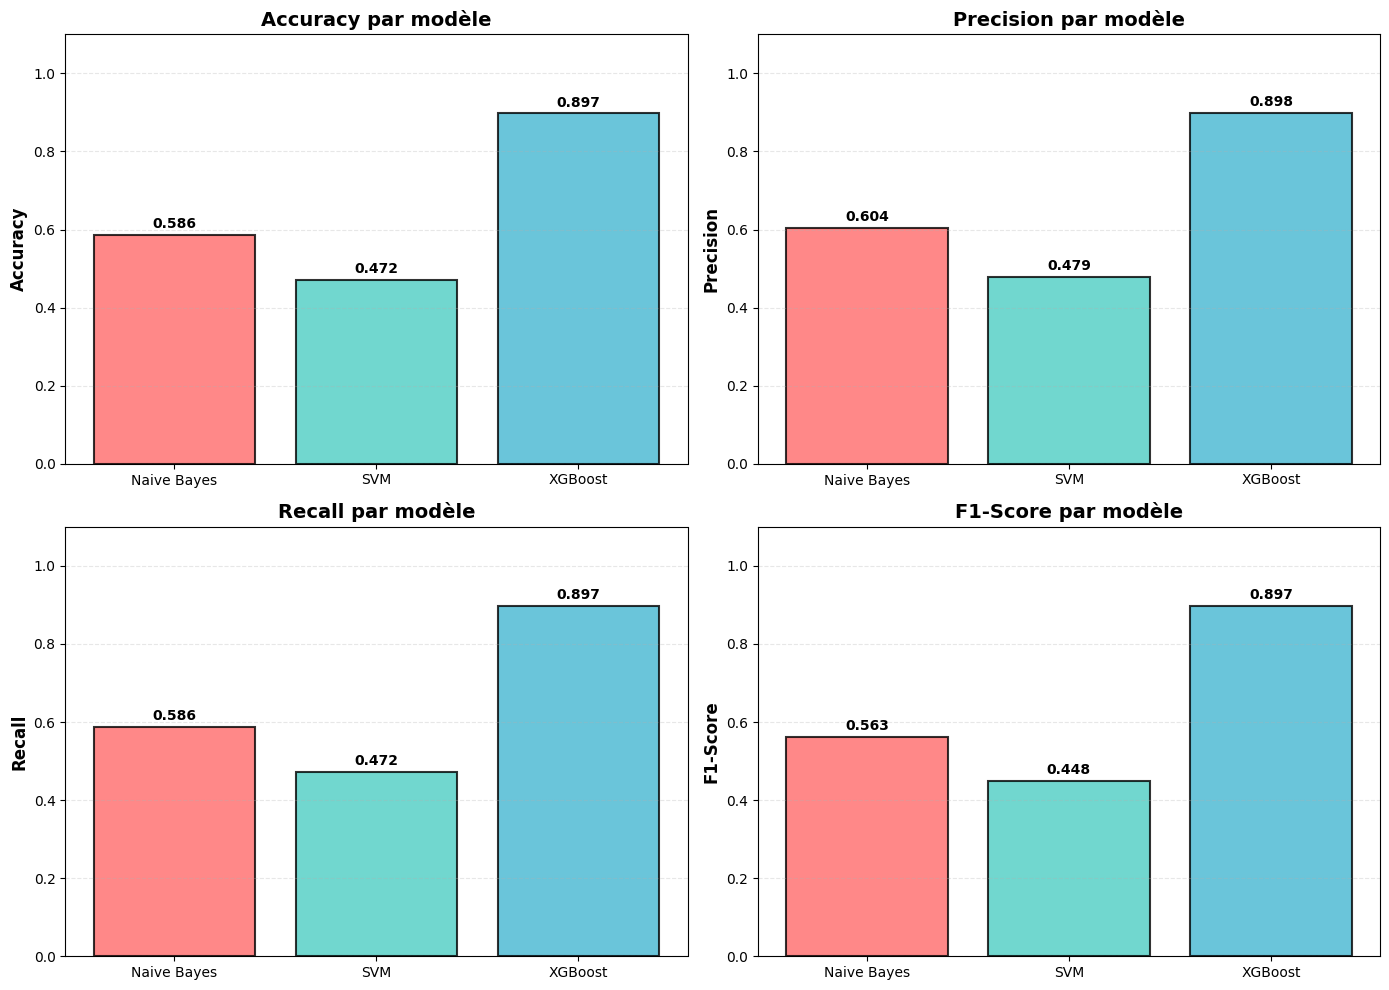

In [41]:
# Visualisation des performances
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models = ['Naive Bayes', 'SVM', 'XGBoost']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    values = [comparison_df.loc[i, metric] for i in range(3)]
    bars = ax.bar(models, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    ax.set_ylabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} par modèle', fontsize=14, fontweight='bold')
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Ajouter les valeurs sur les barres
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{val:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

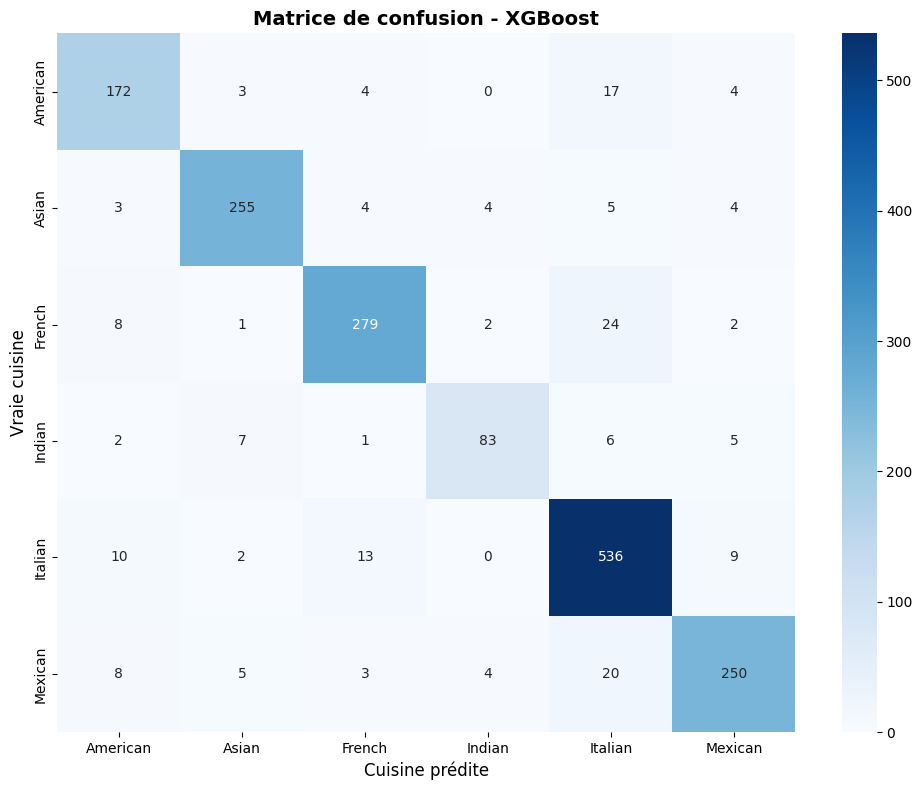

In [42]:
# Matrice de confusion du meilleur modèle
if best_model_name == 'Naive Bayes':
    y_pred_best = y_pred_nb
elif best_model_name == 'SVM':
    y_pred_best = y_pred_svm_final
else:
    y_pred_best = y_pred_xgb

cm = confusion_matrix(y_test_bo5, y_pred_best)

# Obtenir les classes uniques (y_test_bo5 est un numpy array)
unique_classes = np.unique(y_test_bo5)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_classes, 
            yticklabels=unique_classes)
plt.title(f'Matrice de confusion - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Vraie cuisine', fontsize=12)
plt.xlabel('Cuisine prédite', fontsize=12)
plt.tight_layout()
plt.show()

## 🧪 TEST DU MODÈLE AVEC DE NOUVELLES RECETTES

Maintenant, testons le meilleur modèle avec des nouvelles recettes pour prédire leur type de cuisine.

In [43]:
# Fonction pour prédire la cuisine d'une nouvelle recette avec XGBoost
def predict_cuisine(ingredients_list):
    """
    Prédit le type de cuisine à partir d'une liste d'ingrédients en utilisant XGBoost
    
    Parameters:
    -----------
    ingredients_list : list
        Liste des noms d'ingrédients (ex: ['tomato', 'basil', 'mozzarella'])
    
    Returns:
    --------
    tuple : (prediction, probabilities_dict)
        - prediction : str, le type de cuisine prédit
        - probabilities_dict : dict, probabilités pour chaque classe
    """
    
    # Créer un vecteur de features avec tous les ingrédients à 0
    new_recipe = np.zeros(len(ingredient_cols))
    
    # Pour chaque ingrédient de la liste, mettre 1 dans les colonnes correspondantes
    for ingredient in ingredients_list:
        ingredient_lower = ingredient.lower()
        # Trouver les colonnes qui contiennent cet ingrédient
        matching_indices = [i for i, col in enumerate(ingredient_cols) 
                          if ingredient_lower in col.lower()]
        # Mettre ces colonnes à 1
        for idx in matching_indices:
            new_recipe[idx] = 1
    
    # Reshaper pour avoir la bonne dimension (1 recette, n features)
    new_recipe = new_recipe.reshape(1, -1)
    
    # Prédiction avec XGBoost
    prediction_encoded = xgb_model.predict(new_recipe)
    prediction = label_encoder_xgb.inverse_transform(prediction_encoded)[0]
    
    # Obtenir les probabilités
    proba = xgb_model.predict_proba(new_recipe)[0]
    classes = label_encoder_xgb.classes_
    probabilities = dict(zip(classes, proba))
    
    return prediction, probabilities

print("✅ Fonction de prédiction XGBoost créée !")

✅ Fonction de prédiction XGBoost créée !


### Exemple 1 : Recette Mexicaine (Tacos)

In [46]:
# Test 2: Recette Mexicaine
recette_mexicaine = ['tortilla', 'beef', 'cilantro', 'lime', 'cumin', 'jalapeno', 'avocado']

print("🌮 Recette 2 : Tacos mexicains")
print(f"Ingrédients : {', '.join(recette_mexicaine)}")
print("-" * 60)

prediction, probas = predict_cuisine(recette_mexicaine)

print(f"✨ Prédiction : {prediction}")
if probas:
    print(f"\n📊 Probabilités par cuisine :")
    sorted_probas = sorted(probas.items(), key=lambda x: x[1], reverse=True)
    for cuisine, proba in sorted_probas:
        bar = "█" * int(proba * 50)
        print(f"   {cuisine:12} : {proba:5.2%} {bar}")

🌮 Recette 2 : Tacos mexicains
Ingrédients : tortilla, beef, cilantro, lime, cumin, jalapeno, avocado
------------------------------------------------------------
✨ Prédiction : Mexican

📊 Probabilités par cuisine :
   Mexican      : 99.99% █████████████████████████████████████████████████
   Italian      : 0.00% 
   French       : 0.00% 
   Asian        : 0.00% 
   American     : 0.00% 
   Indian       : 0.00% 


### Exemple 2 : Recette Asiatique (Stir-fry)

In [48]:
# Test 3: Recette Asiatique
recette_asiatique = ['soy sauce', 'ginger', 'garlic', 'sesame oil', 'rice', 'chicken', 'vegetables']

print("🥡 Recette 3 : Stir-fry asiatique")
print(f"Ingrédients : {', '.join(recette_asiatique)}")
print("-" * 60)

prediction, probas = predict_cuisine(recette_asiatique)

print(f"✨ Prédiction : {prediction}")
if probas:
    print(f"\n📊 Probabilités par cuisine :")
    sorted_probas = sorted(probas.items(), key=lambda x: x[1], reverse=True)
    for cuisine, proba in sorted_probas:
        bar = "█" * int(proba * 50)
        print(f"   {cuisine:12} : {proba:5.2%} {bar}")

🥡 Recette 3 : Stir-fry asiatique
Ingrédients : soy sauce, ginger, garlic, sesame oil, rice, chicken, vegetables
------------------------------------------------------------
✨ Prédiction : Asian

📊 Probabilités par cuisine :
   Asian        : 99.97% █████████████████████████████████████████████████
   Italian      : 0.01% 
   Indian       : 0.01% 
   Mexican      : 0.01% 
   French       : 0.01% 
   American     : 0.00% 


### Test avec votre propre recette

Vous pouvez maintenant tester avec vos propres ingrédients !

In [49]:
# 🧪 TESTEZ VOTRE PROPRE RECETTE ICI
# Modifiez la liste d'ingrédients ci-dessous

ma_recette = ['chicken', 'curry', 'rice', 'turmeric', 'ginger', 'garlic', 'onion']

print("🍛 Ma recette personnalisée")
print(f"Ingrédients : {', '.join(ma_recette)}")
print("-" * 60)

prediction, probas = predict_cuisine(ma_recette)

print(f"✨ Prédiction : {prediction}")
if probas:
    print(f"\n📊 Probabilités par cuisine :")
    sorted_probas = sorted(probas.items(), key=lambda x: x[1], reverse=True)
    for cuisine, proba in sorted_probas:
        bar = "█" * int(proba * 50)
        print(f"   {cuisine:12} : {proba:5.2%} {bar}")



🍛 Ma recette personnalisée
Ingrédients : chicken, curry, rice, turmeric, ginger, garlic, onion
------------------------------------------------------------
✨ Prédiction : Indian

📊 Probabilités par cuisine :
   Indian       : 63.51% ███████████████████████████████
   Asian        : 36.46% ██████████████████
   Italian      : 0.01% 
   Mexican      : 0.01% 
   French       : 0.01% 
   American     : 0.00% 


---

## 📦 **Export du Modèle XGBoost pour Déploiement**

Exportation des fichiers nécessaires pour intégrer le modèle BO5 dans l'application web.

In [50]:
import joblib
import json
import os

# Créer le dossier models/BO5
models_dir = 'F:/MLdeployment/models/BO5'
os.makedirs(models_dir, exist_ok=True)

# 1. Exporter le modèle XGBoost
joblib.dump(xgb_model, f'{models_dir}/xgb_cuisine_model.pkl')
print("✓ xgb_cuisine_model.pkl exporté")

# 2. Exporter le LabelEncoder
joblib.dump(label_encoder_xgb, f'{models_dir}/label_encoder.pkl')
print("✓ label_encoder.pkl exporté")

# 3. Exporter la liste des colonnes d'ingrédients
with open(f'{models_dir}/ingredient_cols.json', 'w') as f:
    json.dump(ingredient_cols, f)
print("✓ ingredient_cols.json exporté")

# 4. Exporter les noms des cuisines
cuisine_types = label_encoder_xgb.classes_.tolist()
with open(f'{models_dir}/cuisine_types.json', 'w') as f:
    json.dump(cuisine_types, f)
print("✓ cuisine_types.json exporté")

# 5. Exporter les métadonnées du modèle
metadata = {
    'model_type': 'XGBoost Classifier',
    'n_estimators': 100,
    'max_depth': 4,
    'learning_rate': 0.1,
    'n_classes': len(cuisine_types),
    'n_features': len(ingredient_cols),
    'cuisine_types': cuisine_types,
    'accuracy': float(accuracy_xgb),
    'precision': float(precision_xgb),
    'recall': float(recall_xgb),
    'f1_score': float(f1_xgb)
}
with open(f'{models_dir}/model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)
print("✓ model_metadata.json exporté")

print(f"\n🎉 Tous les fichiers exportés dans {models_dir}")
print(f"🍽️ {len(cuisine_types)} types de cuisine | {len(ingredient_cols)} features")
print(f"📊 Accuracy: {accuracy_xgb:.2%} | F1-Score: {f1_xgb:.4f}")

✓ xgb_cuisine_model.pkl exporté
✓ label_encoder.pkl exporté
✓ ingredient_cols.json exporté
✓ cuisine_types.json exporté
✓ model_metadata.json exporté

🎉 Tous les fichiers exportés dans F:/MLdeployment/models/BO5
🍽️ 6 types de cuisine | 4030 features
📊 Accuracy: 89.74% | F1-Score: 0.8971
